# Attribute Information
- **User ID:** Unique identifier for each user.
- **Vehicle Model:** Model of the electric vehicle being charged (e.g., Tesla Model 3, Nissan Leaf).
- **Battery Capacity (kWh):** Total battery capacity of the vehicle in kilowatt-hours.
- **Charging Station ID:** Unique identifier for the charging station used.
- **Charging St**ation Location:** Geographic location of the charging station (e.g., New York, Los Angeles).
- **Charging Start Time:** Timestamp indicating when the charging session began.
- **Charging End Time:** Timestamp indicating when the charging session ended.
- **Energy Consumed (kWh):** Total energy consumed during the charging session, measured in kilowatt-hours.
- **Charging Duration (hours):** Total time taken to charge the vehicle, measured in hours.
- **Charging Rate (kW):** Average power delivery rate during the charging session, measured in kilowatts.
- **Charging Cost (USD):** Total cost incurred for the charging session, measured in US dollars.
- **Time of Day:** Time segment when the charging occurred (e.g., Morning, Afternoon).
- **Day of Week:** Day of the week when the charging occurred (e.g., Monday, Tuesday).
- **State of Charge (Start %):** Battery charge percentage at the start of the charging session.
- **State of Charge (End %):** Battery charge percentage at the end of the charging session.
- **Distance Driven (since last charge) (km):** Distance traveled since the last charging session, measured in kilometers.
- **Temperature (°C):** Ambient temperature during the charging session, measured in degrees Celsius.
- **Vehicle Age (years):** Age of the electric vehicle, measured in years.
- **Charger Type:** Type of charger used (e.g., Level 1, Level 2, DC Fast Charger).
- **User Type:** Classification of user based on driving habits (e.g., Commuter, Long-Distance Traveler).

## Data Source 
https://www.kaggle.com/datasets/valakhorasani/electric-vehicle-charging-patterns

In [1]:
# Import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# For default view 
pd.set_option("display.max_columns", 75)

In [2]:
# Import data 
df = pd.read_csv("/home/western/Documents/Data/ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [4]:
# Check for missing values 
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

### Mean Imputation

In [5]:
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']] =\
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].apply(lambda x: x.fillna(x.mean()))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1320 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1320 non-null   float64
 10  Charging Cost (USD)                 

### Categorical columns 

In [7]:
 
# Loop through each column and print the count of categorical values
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Column '{col}' categorical values count:")
    print(df[col].value_counts())
    print()

Column 'User ID' categorical values count:
User ID
User_1       1
User_887     1
User_885     1
User_884     1
User_883     1
            ..
User_440     1
User_439     1
User_438     1
User_437     1
User_1320    1
Name: count, Length: 1320, dtype: int64

Column 'Vehicle Model' categorical values count:
Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

Column 'Charging Station ID' categorical values count:
Charging Station ID
Station_108    9
Station_17     7
Station_97     7
Station_74     7
Station_10     7
              ..
Station_331    1
Station_440    1
Station_70     1
Station_375    1
Station_374    1
Name: count, Length: 462, dtype: int64

Column 'Charging Station Location' categorical values count:
Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

Column 'Charging Start Time

In [8]:
### Drop columns 

df = df.drop(columns=['User ID', 'Charging Station ID'],errors='ignore') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vehicle Model                             1320 non-null   object 
 1   Battery Capacity (kWh)                    1320 non-null   float64
 2   Charging Station Location                 1320 non-null   object 
 3   Charging Start Time                       1320 non-null   object 
 4   Charging End Time                         1320 non-null   object 
 5   Energy Consumed (kWh)                     1320 non-null   float64
 6   Charging Duration (hours)                 1320 non-null   float64
 7   Charging Rate (kW)                        1320 non-null   float64
 8   Charging Cost (USD)                       1320 non-null   float64
 9   Time of Day                               1320 non-null   object 
 10  Day of Week                         

## Calculate duration of charging 

In [9]:
# Convert to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate duration using datetime columns
df['Duration'] = (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600  # Duration in hours

# Separate date and time components (optional)
df['Start Date'] = df['Charging Start Time'].dt.date
df['Start Time'] = df['Charging Start Time'].dt.time
df['End Date'] = df['Charging End Time'].dt.date
df['End Time'] = df['Charging End Time'].dt.time

# Drop charging start and end timne columns 
df = df.drop(columns=['Charging Start Time', 'Charging End Time', 'Start Date', 'End Date',
                     'End Time', 'Start Time'
                     ],errors='ignore') 

df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Duration
0,BMW i3,108.463007,Houston,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter,0.650000
1,Hyundai Kona,100.000000,San Francisco,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver,2.016667
2,Chevy Bolt,75.000000,San Francisco,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter,2.800000
3,Hyundai Kona,50.000000,Houston,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler,3.700000
4,Hyundai Kona,50.000000,Los Angeles,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler,1.766667


### Correlation heatmap

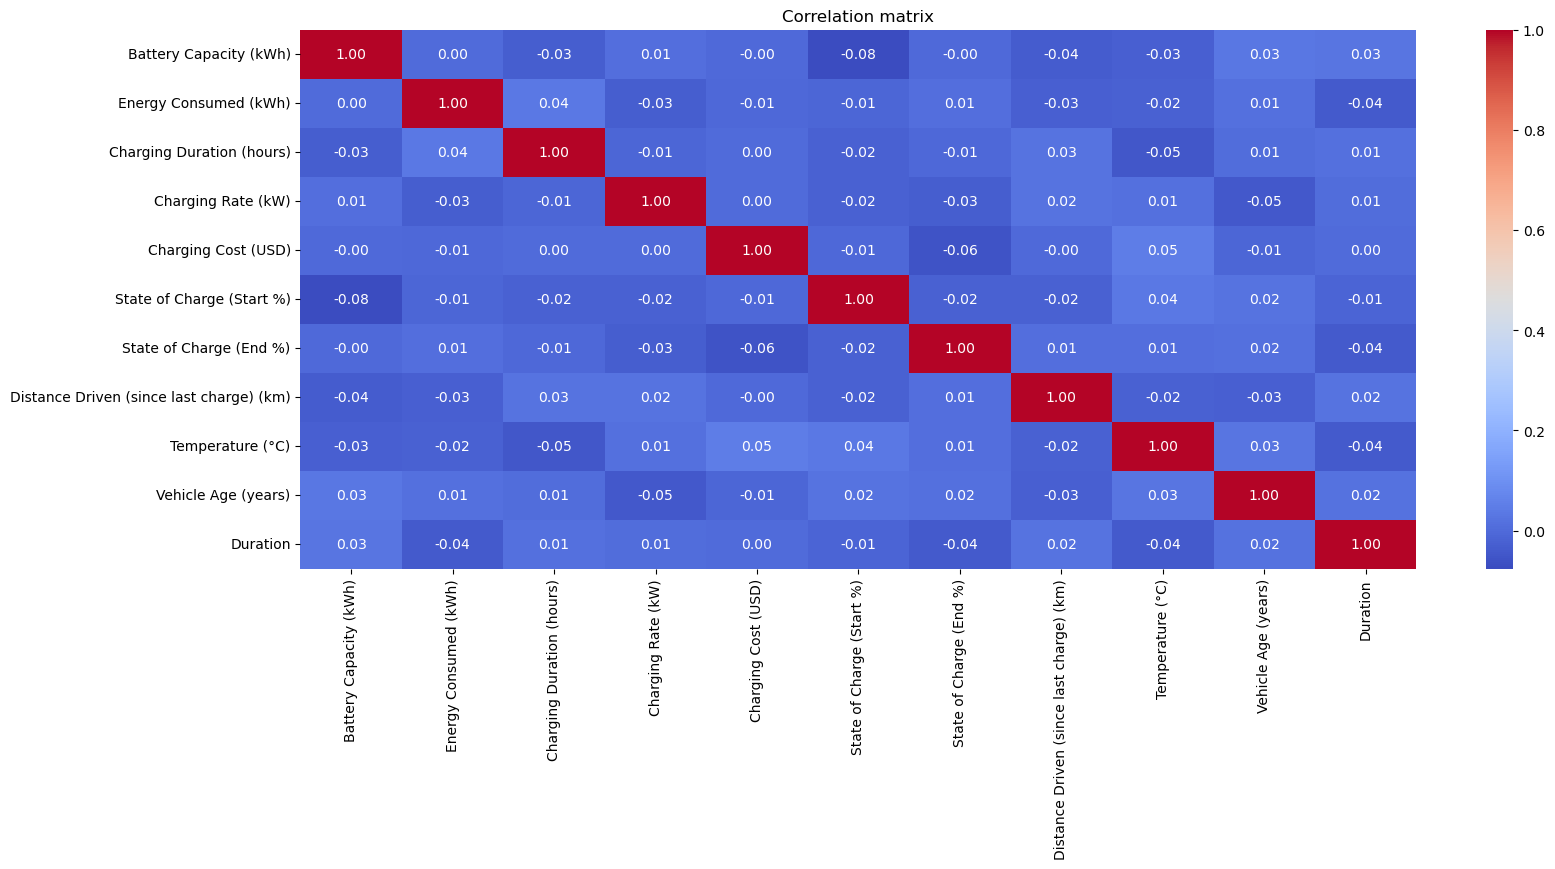

In [10]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='spearman')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

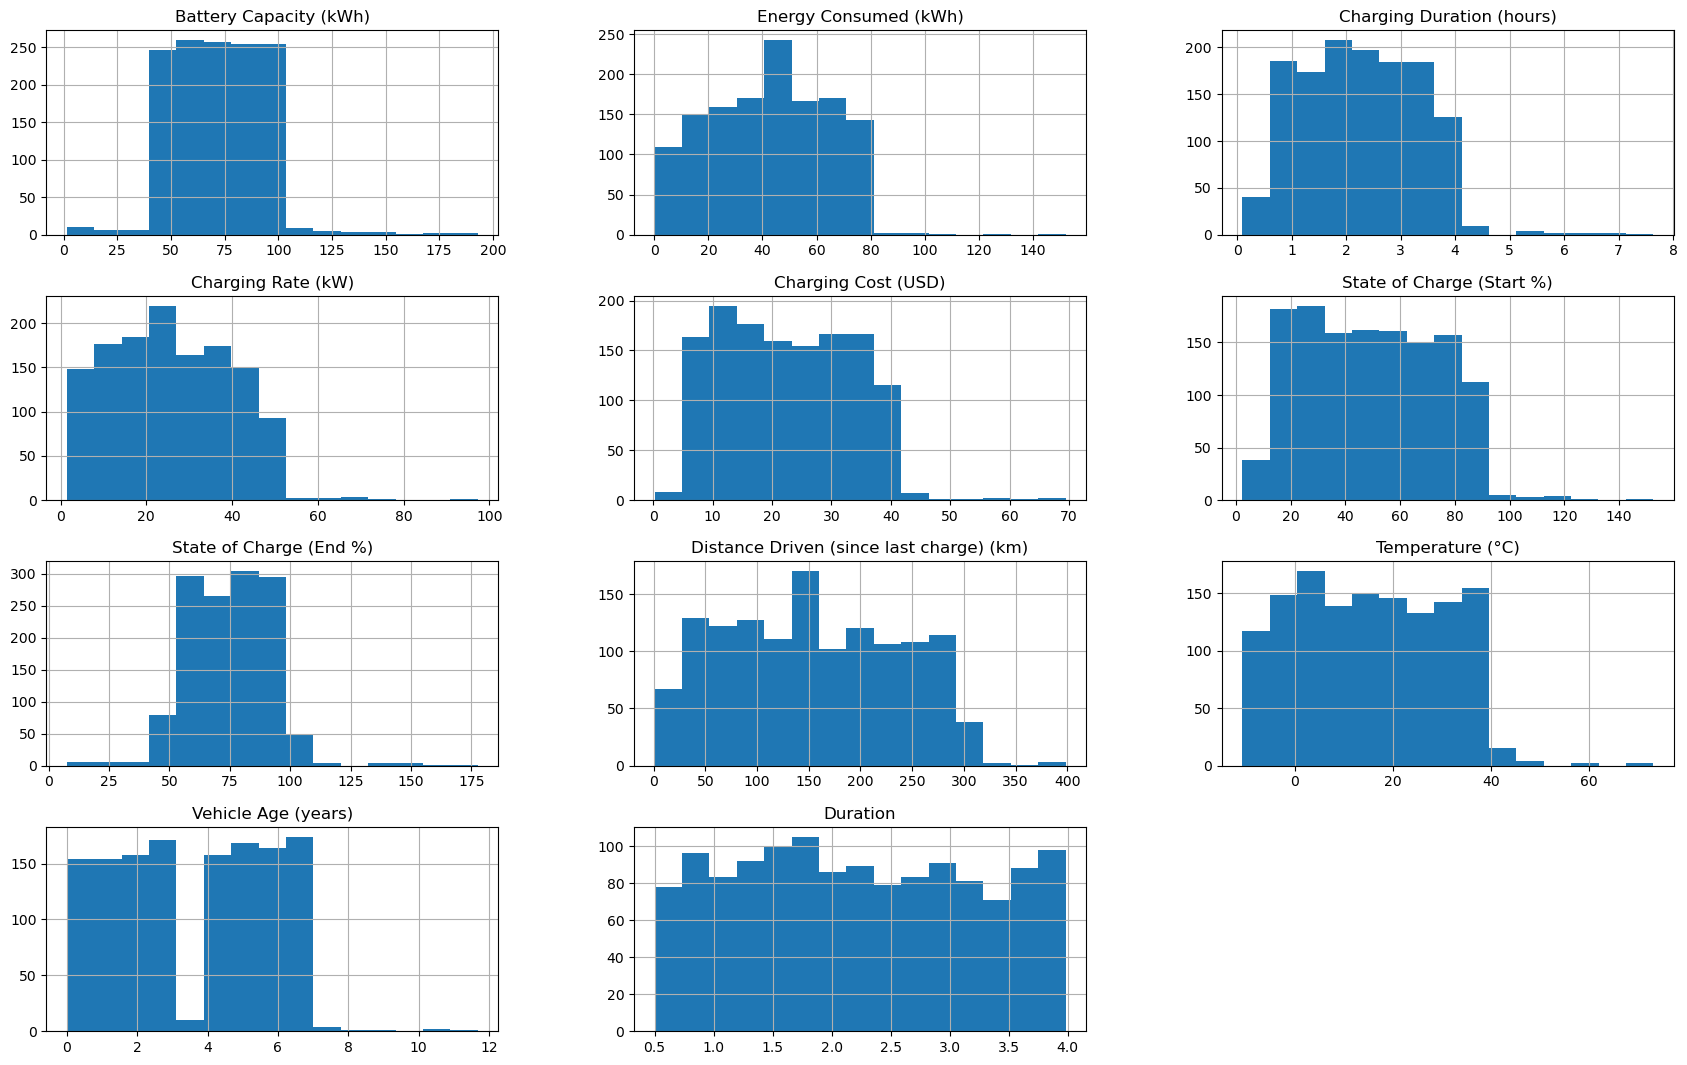

In [11]:
# Data distribution
df.hist(bins=15, figsize=(21,13));

### Outliers 


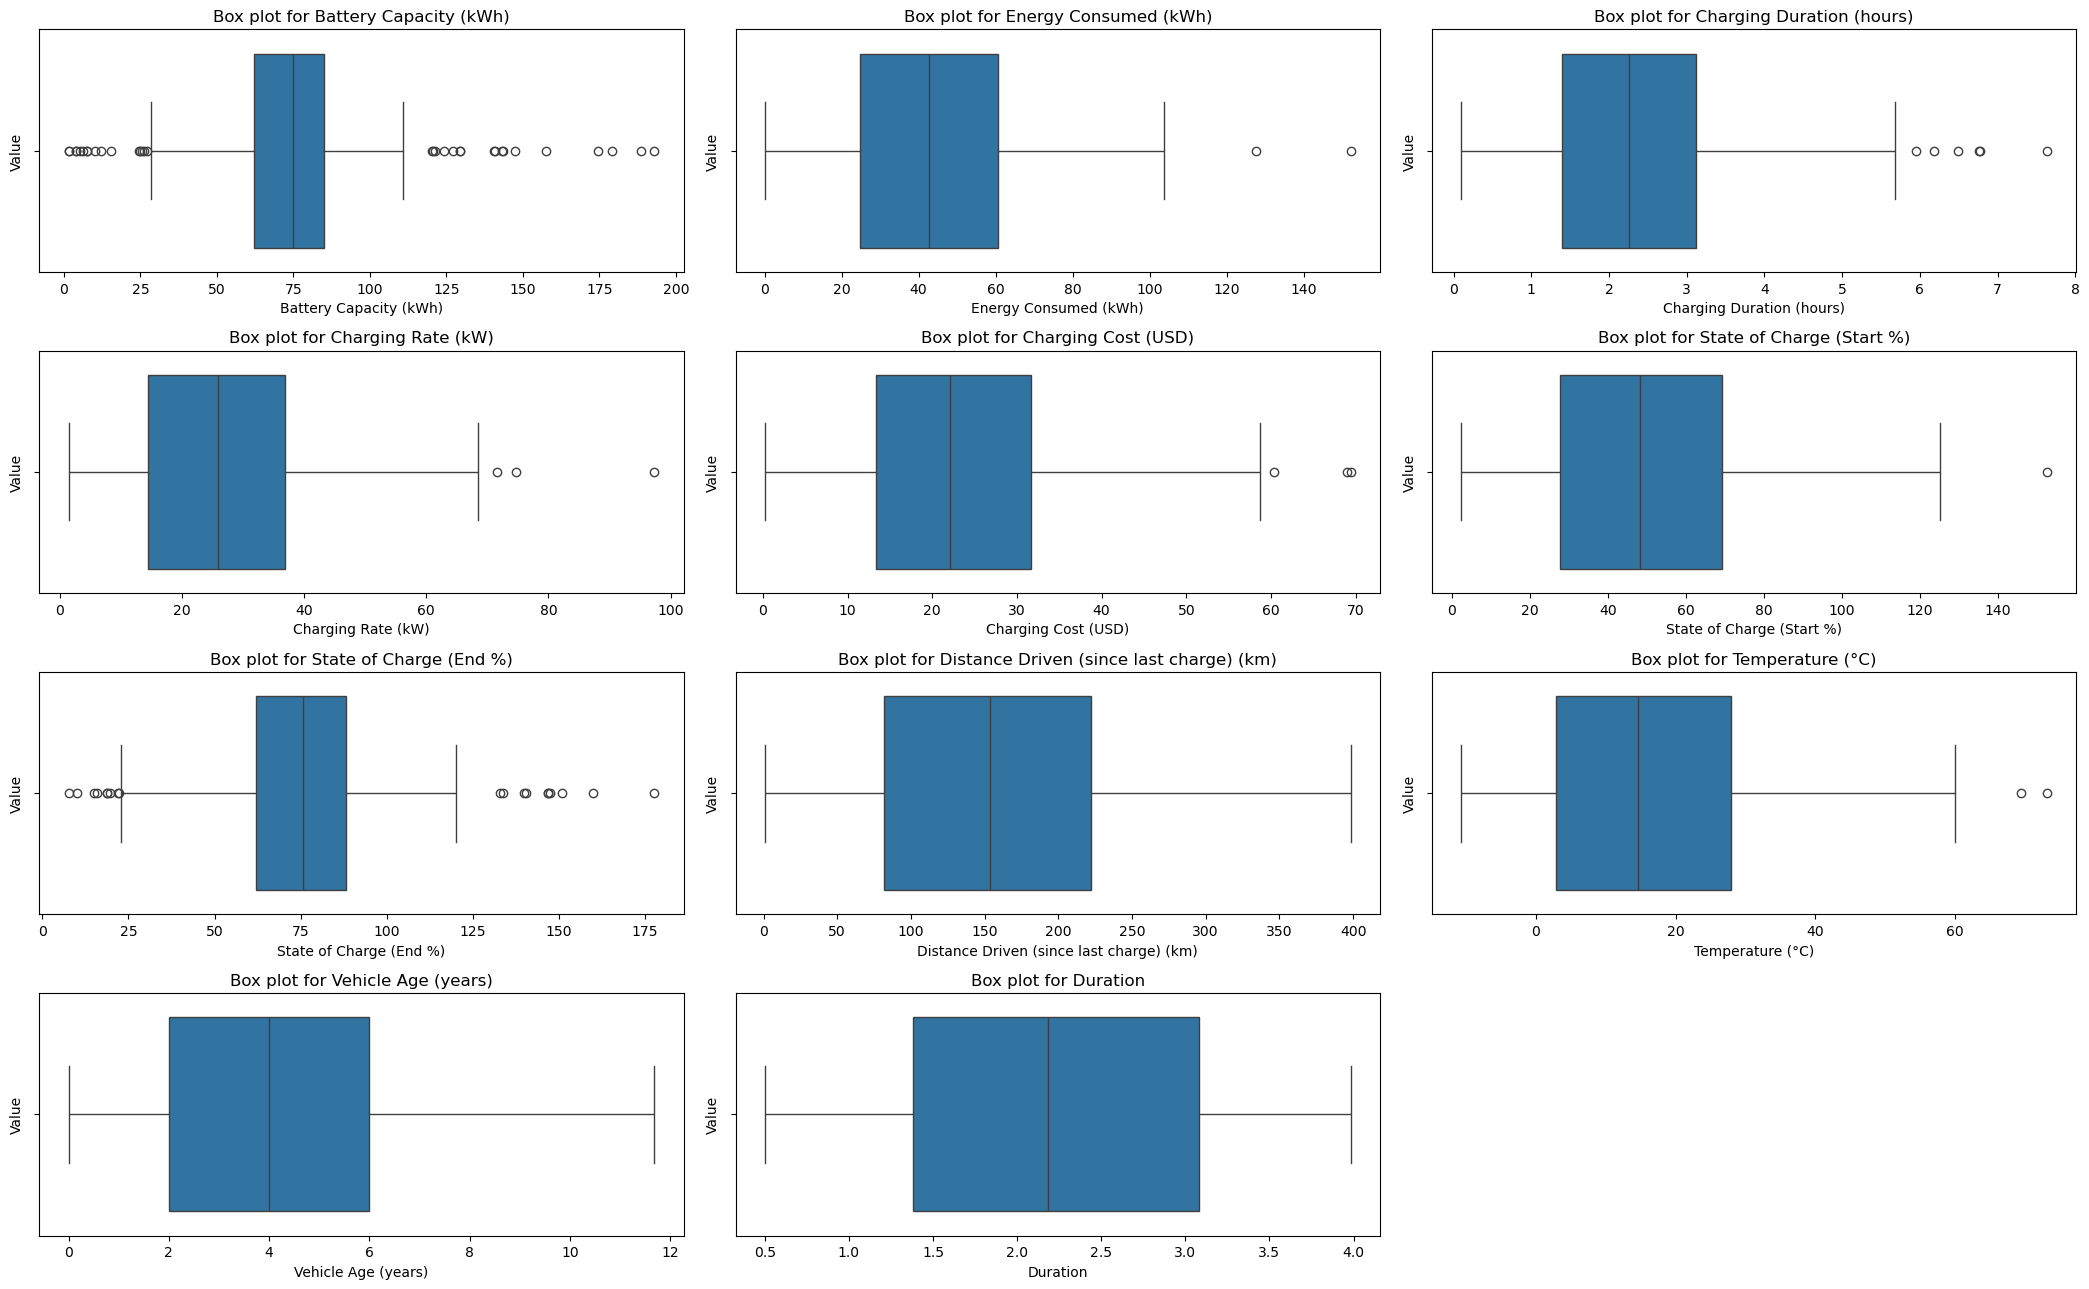

In [12]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]

# Grid layout
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

Observation 
- No significant Outliers 

In [13]:
# import pandas as pd
# import numpy as np

# # Make a copy of the original DataFrame
# df_log = df.copy()

# # Apply Log transformation to each numeric column
# for col in df_log.select_dtypes(include=[np.number]).columns:
#     # Ensure all values are positive
#     if (df_log[col] <= 0).any():
#         df_log[col] = df_log[col] + abs(df_log[col].min()) + 1
    
#     # Apply log transformation
#     df_log[col] = np.log(df_log[col])

# print("Log Transformation Applied Successfully")
# df_log.head()


###  Box Cox transformation
- Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution.

In [14]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np

# Make a copy of the original DataFrame
df_boxcox = df.copy()

# Apply Box-Cox transformation to each numeric column
for col in df_boxcox.select_dtypes(include=['number']).columns:
    # Ensure all values are positive (Box-Cox requirement)
    if (df_boxcox[col] <= 0).any():
        df_boxcox[col] = df_boxcox[col] + abs(df_boxcox[col].min()) + 1
    
    # Apply Box-Cox transformation
    df_boxcox[col], _ = boxcox(df_boxcox[col])

print("Box-Cox Transformation Applied Successfully")
df = df_boxcox.copy()


Box-Cox Transformation Applied Successfully


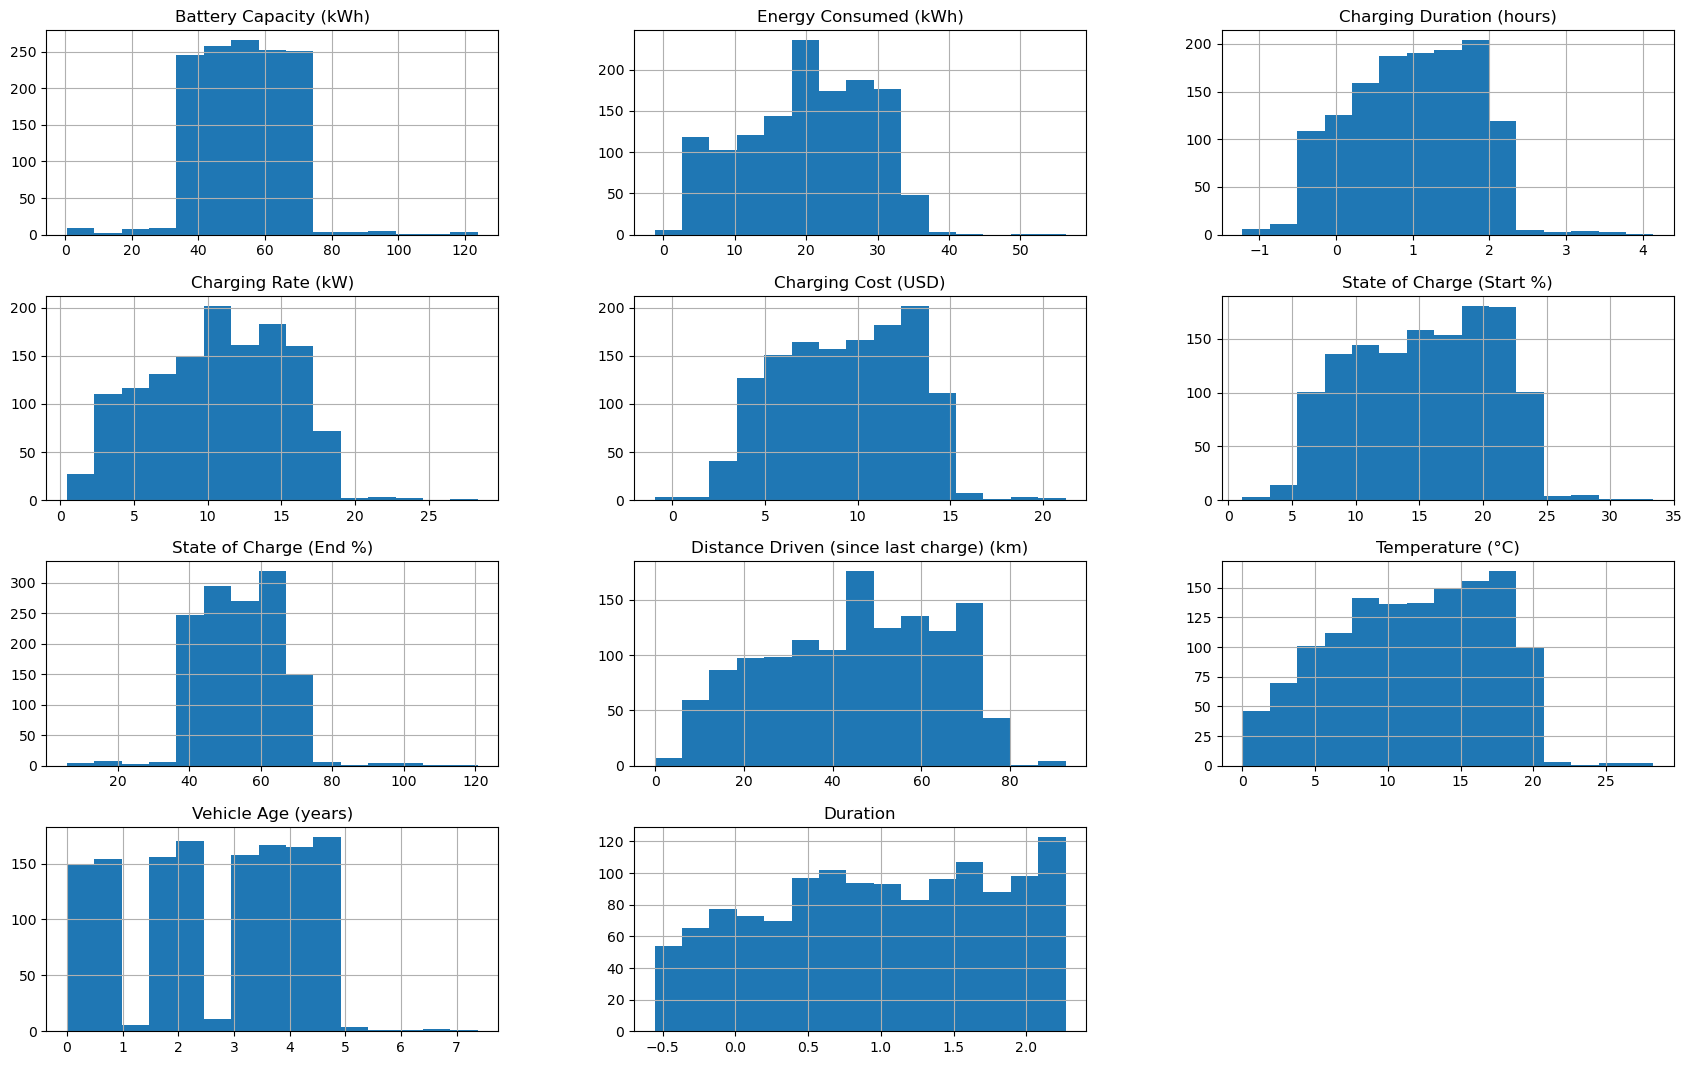

In [15]:
df.hist(bins=15, figsize=(21,13));

#### Observation 
- Box Cox transformation worked better than log transformation

### Encoding 
- The converting of categorical variables into numerical representations that can be understood by machine learning algorithms.

In [16]:

# Loop through each column and print the count of categorical values
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Column '{col}' categorical values count:")
    print(df[col].value_counts())
    print()

Column 'Vehicle Model' categorical values count:
Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

Column 'Charging Station Location' categorical values count:
Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

Column 'Time of Day' categorical values count:
Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

Column 'Day of Week' categorical values count:
Day of Week
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

Column 'Charger Type' categorical values count:
Charger Type
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

Column 'User Type' categorical values count:
User Type
Commuter       

In [17]:
categorical_cols 

Index(['Vehicle Model', 'Charging Station Location', 'Time of Day',
       'Day of Week', 'Charger Type', 'User Type'],
      dtype='object')

### Label Encoder 

In [18]:
# Encode categorical features
categorical_features = [ 'Time of Day','Day of Week', 'Charger Type', 'User Type']

#Initialize and apply Label Encoding directly to 'df'
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

#Display a portion of the modified DataFrame
df.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Duration
0,BMW i3,73.429762,Houston,27.611914,-0.446936,14.265666,6.410934,1,5,11.211985,61.975869,74.467962,16.306547,1.684825,0,1,-0.374414
1,Hyundai Kona,68.192361,San Francisco,7.436806,1.675299,12.612263,9.218130,2,1,5.076206,61.006424,37.298211,11.902409,2.398631,1,0,0.894448
2,Chevy Bolt,52.433115,San Francisco,10.848034,1.207711,11.649528,13.425104,2,4,3.659106,51.093708,26.934096,14.138173,1.684825,2,1,1.480208
3,Hyundai Kona,36.110395,Houston,34.078423,0.254767,13.262531,6.391157,1,2,22.569448,70.901809,56.521691,19.326631,0.902225,1,2,2.088961
4,Hyundai Kona,36.110395,Los Angeles,11.085982,0.885337,5.405490,5.235300,2,2,17.033657,46.888639,57.347951,2.225719,0.902225,1,2,0.692188


### One Hot Encoding 

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['Vehicle Model', 'Charging Station Location'] # 

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df_new = encoded_df.copy()

df_new.head()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Duration,Vehicle Model_Chevy Bolt,Vehicle Model_Hyundai Kona,Vehicle Model_Nissan Leaf,Vehicle Model_Tesla Model 3,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco
0,73.429762,27.611914,-0.446936,14.265666,6.410934,1,5,11.211985,61.975869,74.467962,16.306547,1.684825,0,1,-0.374414,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,68.192361,7.436806,1.675299,12.612263,9.218130,2,1,5.076206,61.006424,37.298211,11.902409,2.398631,1,0,0.894448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,52.433115,10.848034,1.207711,11.649528,13.425104,2,4,3.659106,51.093708,26.934096,14.138173,1.684825,2,1,1.480208,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36.110395,34.078423,0.254767,13.262531,6.391157,1,2,22.569448,70.901809,56.521691,19.326631,0.902225,1,2,2.088961,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36.110395,11.085982,0.885337,5.405490,5.235300,2,2,17.033657,46.888639,57.347951,2.225719,0.902225,1,2,0.692188,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# OLS Modelling 

In [20]:
# Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Drop null values
df_new = df_new.dropna()

# Defining the dependent variables/features
X = df_new.drop(columns=['Energy Consumed (kWh)'])

# Target variable
y = df_new['Energy Consumed (kWh)']

# Split into training and temporary sets (70% train, 30% temp)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [21]:
# ['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
#        'Charging Duration (hours)', 'Charging Rate (kW)',
#        'Charging Cost (USD)', 'State of Charge (Start %)',
#        'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
#        'Temperature (°C)', 'Vehicle Age (years)', 'Duration']

In [22]:
# Columns to scale
columns_to_scale = ['Battery Capacity (kWh)', 'Charging Cost (USD)',
       'Charging Duration (hours)', 'Charging Rate (kW)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)', 'Duration']

# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the specified columns in the training data
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the specified columns in the test data

X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


## Ordinary least squares

In [23]:
# Add a constant to the predictors (for statsmodels)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model
linreg = sm.OLS(y_train, X_train_const).fit()

# Print the model summary with column names
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Energy Consumed (kWh)   R-squared:                       0.028
Model:                               OLS   Adj. R-squared:                  0.004
Method:                    Least Squares   F-statistic:                     1.162
Date:                   Wed, 08 Jan 2025   Prob (F-statistic):              0.274
Time:                           00:24:45   Log-Likelihood:                -3313.0
No. Observations:                    924   AIC:                             6672.
Df Residuals:                        901   BIC:                             6783.
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       20.7785      1.205     17.237      0.000      18.413      23.144
Battery Capacity (kWh)                      -0.3863      0.294     -1.313      0.190      -0.964       0.191
Charging Duration (hours)                    0.3149      0.296      1.063      0.288      -0.267       0.896
Charging Rate (kW)                          -0.3483      0.294     -1.185      0.236      -0.925       0.228
Charging Cost (USD)                         -0.2310      0.294     -0.785      0.433      -0.809       0.347
Time of Day                                 -0.2089      0.270     -0.774      0.439      -0.739       0.321
Day of Week                                 -0.0493      0.147     -0.335      0.737      -0.338       0.239
State of Charge (Start %)                   -0.2635      0.294     -0.897      0.370      -0.840       0.313
State of Charge (End %)                      0.1045      0.294      0.356      0.722      -0.472       0.680
Distance Driven (since last charge) (km)    -0.3092      0.295     -1.050      0.294      -0.887       0.269
Temperature (°C)                            -0.2782      0.295     -0.943      0.346      -0.857       0.301
Vehicle Age (years)                          0.3069      0.294      1.045      0.296      -0.269       0.883
Charger Type                                 0.8822      0.363      2.427      0.015       0.169       1.596
User Type                                   -0.2880      0.368     -0.783      0.434      -1.010       0.434
Duration                                    -0.4916      0.293     -1.680      0.093      -1.066       0.083
Vehicle Model_Chevy Bolt                    -0.6556      0.942     -0.696      0.487      -2.505       1.193
Vehicle Model_Hyundai Kona                   0.6873      0.953      0.722      0.471      -1.182       2.557
Vehicle Model_Nissan Leaf                   -0.2842      0.949     -0.299      0.765      -2.147       1.579
Vehicle Model_Tesla Model 3                  0.5338      0.917      0.582      0.561      -1.266       2.334
Charging Station Location_Houston           -0.3627      0.958     -0.378      0.705      -2.244       1.518
Charging Station Location_Los Angeles       -1.3420      0.918     -1.461      0.144      -3.144       0.460
Charging Station Location_New York          -0.9182      0.972     -0.945      0.345      -2.825       0.989
Charging Station Location_San Francisco     -1.4411      0.949     -1.519      0.129      -3.304       0.421
==============================================================================
Omnibus:                       23.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB): 

### Recusive feature elimination 

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression
linear_reg = LinearRegression()

# Initialize RFE with the Linear Regression model and desired number of features
rfe = RFE(estimator=linear_reg, n_features_to_select=53)

# Fit RFE on training data
rfe = rfe.fit(X_train_scaled, y_train)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Display the selected features mask
print(selected_features_mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


/home/western/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=53 > n_features=22. There will be no feature selection and all features will be kept.
  warnings.warn(


In [25]:
# List features, their selection status, and their ranks
feature_selection = list(zip(X_train_scaled, rfe.support_, rfe.ranking_))

# Display the feature selection results
for feature, selected, rank in feature_selection:
    print(f"Feature: {feature}, Selected: {selected}, Rank: {rank}")


Feature: Battery Capacity (kWh), Selected: True, Rank: 1
Feature: Charging Duration (hours), Selected: True, Rank: 1
Feature: Charging Rate (kW), Selected: True, Rank: 1
Feature: Charging Cost (USD), Selected: True, Rank: 1
Feature: Time of Day, Selected: True, Rank: 1
Feature: Day of Week, Selected: True, Rank: 1
Feature: State of Charge (Start %), Selected: True, Rank: 1
Feature: State of Charge (End %), Selected: True, Rank: 1
Feature: Distance Driven (since last charge) (km), Selected: True, Rank: 1
Feature: Temperature (°C), Selected: True, Rank: 1
Feature: Vehicle Age (years), Selected: True, Rank: 1
Feature: Charger Type, Selected: True, Rank: 1
Feature: User Type, Selected: True, Rank: 1
Feature: Duration, Selected: True, Rank: 1
Feature: Vehicle Model_Chevy Bolt, Selected: True, Rank: 1
Feature: Vehicle Model_Hyundai Kona, Selected: True, Rank: 1
Feature: Vehicle Model_Nissan Leaf, Selected: True, Rank: 1
Feature: Vehicle Model_Tesla Model 3, Selected: True, Rank: 1
Feature: C

## Multicolinearlity with VIF

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

print(vif_data)


                                     Feature       VIF
0                     Battery Capacity (kWh)  1.023900
1                  Charging Duration (hours)  1.036201
2                         Charging Rate (kW)  1.021314
3                        Charging Cost (USD)  1.024311
4                                Time of Day  2.531737
5                                Day of Week  2.836232
6                  State of Charge (Start %)  1.020415
7                    State of Charge (End %)  1.018487
8   Distance Driven (since last charge) (km)  1.026088
9                           Temperature (°C)  1.026645
10                       Vehicle Age (years)  1.020091
11                              Charger Type  2.278344
12                                 User Type  2.491158
13                                  Duration  1.012937
14                  Vehicle Model_Chevy Bolt  1.856803
15                Vehicle Model_Hyundai Kona  1.701032
16                 Vehicle Model_Nissan Leaf  1.733923
17        

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Add a constant to the test data
X_test_const = sm.add_constant(X_test_scaled)

# Perform predictions on the test data
y_pred = linreg.predict(X_test_const)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test_const.shape[1] - 1))

# Display the metrics
print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Adjusted R²: {adjusted_r2:.2f}")

Model Evaluation Metrics:
MAE: 7.33
MSE: 79.84
RMSE: 8.94
R²: -0.03
Adjusted R²: -0.10


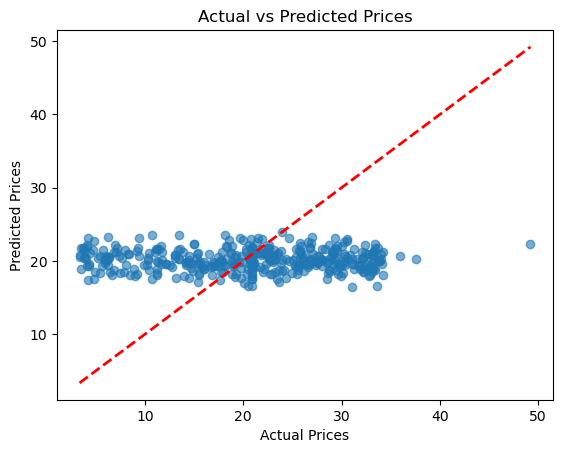

In [28]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()